# Lab 2 


**Lab 2**
Assignment Objectives:  
Upon successful completion of this assignment, a student will be able to:
* Gain experience using and writing functions.
* Use basic statistical functions
* Gain experience in exploratory data visualization
* Use basic data cleanging.

The next code cell is required to use the autograder when running on Colab/DeepNote (uncomment the code). If you are using an environment with `otter-grader` already installed, then leave the code commented out.  

In [59]:
#  Import libraries 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import otter
grader = otter.Notebook()

*Tip: It is good practice to list all imports needed at the top of the notebook.  You can import modules in later cells as needed, but listing them at the top clearly shows all which are needed to be available / installed.*

### Data 

You will again be using the Auto-MPG data set available on the UCI repository. 

https://archive.ics.uci.edu/ml/datasets/Auto+MPG



## Exercise 1 - Import Data 
You will want to create a function to import the data 

The function should be named `ImportData(url, col_names)`    
`ImportData` has two input arguments: 
* `url` - a string that links to the data to be imported, and 
* `col_names` - a list of strings container each column names. 

In the function, you should import the data using `read_csv`, set the column names to `col_names`, and set the DataFrame index (*row labels*) to `carName`.  

The column names should be set to: 'mpg', 'cyl', 'disp', 'hp', 'weight', 'accel', 'model year', 'origin', 'car name'. 

For this function, do not use the `na_values` argument of `read_csv`.  We will handle missing data later in the notebook.

The function should return the DataFrame. 

Helpful links: 

* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html#pandas.read_table

In [60]:
# Create the function ImportData here and return the data 

def ImportData(url, col_names):
    # return the created DataFrame, df 
    df =pd.read_csv(url, header=None, names=col_names, delim_whitespace=True) # making the header none so we can insert ours and removing the white spaces 
    df.set_index('car name', inplace=True , drop= False) # seting the index dataframe to car name and saving it our dataframe using inplace
    return df

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'  
cNames = ['mpg', 'cyl', 'disp', 'hp', 'weight', 'accel', 'model year', 'origin', 'car name']
data = ImportData(url, cNames)
data.head()

mpg  cyl   disp     hp  weight  accel  model year  \
car name                                                                        
chevrolet chevelle malibu  18.0    8  307.0  130.0  3504.0   12.0          70   
buick skylark 320          15.0    8  350.0  165.0  3693.0   11.5          70   
plymouth satellite         18.0    8  318.0  150.0  3436.0   11.0          70   
amc rebel sst              16.0    8  304.0  150.0  3433.0   12.0          70   
ford torino                17.0    8  302.0  140.0  3449.0   10.5          70   

                           origin                   car name  
car name                                                      
chevrolet chevelle malibu       1  chevrolet chevelle malibu  
buick skylark 320               1          buick skylark 320  
plymouth satellite              1         plymouth satellite  
amc rebel sst                   1              amc rebel sst  
ford torino                     1                ford torino

In [61]:
grader.check("q1")

q1 results: All test cases passed!

## Exercise 2: Data Cleaning 

The data cleaning part will have multiple goals: to handle any missing data and to process the string data to remove spaces and replace with an underscore. 

You will create a function, named ColDataClean(data) that:

* Identify any Null/NA/NaN entries in the DataFrame, print out what entries will be removed, and remove them 
* Change the column labels (headers) from all lower case to [title case](https://danielmiessler.com/p/a-list-of-different-case-types/) and then replace "space" with underscore, "_". Print the column headers before and after.
* Change the DataFrame index (row labels) also be title case, that is, replace all spaces with underscore

In [62]:
def ColDataClean(df):
    # Identify, print, and remove any entries with Null / NA / NaN
    print(df.isna().any()) #Identifying if their are any null values in data frame
    
    print("*** Removing null entries ***")
    df.dropna(axis=0, how='any',inplace=True) #Removing any null values in the data set and save it in our data frame using the inplace function
    
    print("*** String Operations on Column Headers ***")
    print("  Before: ", df.columns)
    df.columns=df.columns.str.title() # changing the column names to title case
    
    print("  After: ", df.columns)
    df.columns=df.columns.str.replace(' ', '_') #Replacing the white spaces in column headers with Underscore
    
    print("*** String Operations on index strings *** \n")
    df.index=df.index.str.title()   #changing Dataframe index to be title case
    df.index=df.index.str.replace(' ','_') #Replacing the white spaces in Dataframe index with Underscore
    
    return df

data = ColDataClean(data)

data.head()

mpg           False
cyl           False
disp          False
hp            False
weight        False
accel         False
model year    False
origin        False
car name      False
dtype: bool
*** Removing null entries ***
*** String Operations on Column Headers ***
  Before:  Index(['mpg', 'cyl', 'disp', 'hp', 'weight', 'accel', 'model year', 'origin',
       'car name'],
      dtype='object')
  After:  Index(['Mpg', 'Cyl', 'Disp', 'Hp', 'Weight', 'Accel', 'Model Year', 'Origin',
       'Car Name'],
      dtype='object')
*** String Operations on index strings *** 



Mpg  Cyl   Disp     Hp  Weight  Accel  Model_Year  \
car name                                                                        
Chevrolet_Chevelle_Malibu  18.0    8  307.0  130.0  3504.0   12.0          70   
Buick_Skylark_320          15.0    8  350.0  165.0  3693.0   11.5          70   
Plymouth_Satellite         18.0    8  318.0  150.0  3436.0   11.0          70   
Amc_Rebel_Sst              16.0    8  304.0  150.0  3433.0   12.0          70   
Ford_Torino                17.0    8  302.0  140.0  3449.0   10.5          70   

                           Origin                   Car_Name  
car name                                                      
Chevrolet_Chevelle_Malibu       1  chevrolet chevelle malibu  
Buick_Skylark_320               1          buick skylark 320  
Plymouth_Satellite              1         plymouth satellite  
Amc_Rebel_Sst                   1              amc rebel sst  
Ford_Torino                     1                ford torino

In [63]:
grader.check("q2")

q2 results: All test cases passed!

## Exercise 3: Data Cleaning and Manipulation 

Look at the types for each column of the DataFrame. 

In [64]:
data.dtypes

Mpg           float64
Cyl             int64
Disp          float64
Hp             object
Weight        float64
Accel         float64
Model_Year      int64
Origin          int64
Car_Name       object
dtype: object

Horsepower, `Hp`, is considered an object.  But, really this should be a float.  Why is this a float?

In [65]:
data[data["Hp"] == '?']

Mpg  Cyl   Disp Hp  Weight  Accel  Model_Year  Origin  \
car name                                                                       
Ford_Pinto            25.0    4   98.0  ?  2046.0   19.0          71       1   
Ford_Maverick         21.0    6  200.0  ?  2875.0   17.0          74       1   
Renault_Lecar_Deluxe  40.9    4   85.0  ?  1835.0   17.3          80       2   
Ford_Mustang_Cobra    23.6    4  140.0  ?  2905.0   14.3          80       1   
Renault_18I           34.5    4  100.0  ?  2320.0   15.8          81       2   
Amc_Concord_Dl        23.0    4  151.0  ?  3035.0   20.5          82       1   

                                  Car_Name  
car name                                    
Ford_Pinto                      ford pinto  
Ford_Maverick                ford maverick  
Renault_Lecar_Deluxe  renault lecar deluxe  
Ford_Mustang_Cobra      ford mustang cobra  
Renault_18I                    renault 18i  
Amc_Concord_Dl              amc concord dl

There are some missing values in this column that need to be handled.

Create a function `HandleHP(df, col)`, that changes all the "?" values to a replacement value 99 and converts the column to be a float, where
* `df` is a DataFrame to be worked on 
* `col` is the name of the column to be "handled"



In [66]:
def HandleHp(df, col):
    # Guarding 
    if (df[col].dtypes == 'object'): #checking the datatype of the column if it is an object
        df[col]= df[col].replace('?',99) # Replacing the '?' with 99
        print(df[col])
        print ("  Current data type is : ", df[col].dtypes)
        df[col]=df[col].astype(float)   #changing the data type of the column from object to float
        
        print (" Changed data type is : ", df[col].dtypes)
        
    return df
HandleHp(data, 'Hp')
print(data.dtypes)

car name
Chevrolet_Chevelle_Malibu    130.0
Buick_Skylark_320            165.0
Plymouth_Satellite           150.0
Amc_Rebel_Sst                150.0
Ford_Torino                  140.0
                             ...  
Ford_Mustang_Gl              86.00
Vw_Pickup                    52.00
Dodge_Rampage                84.00
Ford_Ranger                  79.00
Chevy_S-10                   82.00
Name: Hp, Length: 398, dtype: object
  Current data type is :  object
 Changed data type is :  float64
Mpg           float64
Cyl             int64
Disp          float64
Hp            float64
Weight        float64
Accel         float64
Model_Year      int64
Origin          int64
Car_Name       object
dtype: object


In [67]:
grader.check("q3")

q3 results: All test cases passed!

## Exercise 4: Data Aggregation and Grouping 

Add two new columns for Kmpl (km per liter) and Kmpg (km per gallon). 

Note, the conversions are 1 mpg = 0.425144 kmpl  and 1 mpg = 1.609 kmpg.

_Type your answer here, replacing this text._

In [68]:
#  Add two new columns
data['Kmpl']= data['Mpg']*0.425144 #adding two new columns to the dataframe and adding values by calculating using the given formula
data['Kmpg']= data['Mpg']*1.609

print (data.head())

                            Mpg  Cyl   Disp     Hp  Weight  Accel  Model_Year  \
car name                                                                        
Chevrolet_Chevelle_Malibu  18.0    8  307.0  130.0  3504.0   12.0          70   
Buick_Skylark_320          15.0    8  350.0  165.0  3693.0   11.5          70   
Plymouth_Satellite         18.0    8  318.0  150.0  3436.0   11.0          70   
Amc_Rebel_Sst              16.0    8  304.0  150.0  3433.0   12.0          70   
Ford_Torino                17.0    8  302.0  140.0  3449.0   10.5          70   

                           Origin                   Car_Name      Kmpl    Kmpg  
car name                                                                        
Chevrolet_Chevelle_Malibu       1  chevrolet chevelle malibu  7.652592  28.962  
Buick_Skylark_320               1          buick skylark 320  6.377160  24.135  
Plymouth_Satellite              1         plymouth satellite  7.652592  28.962  
Amc_Rebel_Sst              

In [69]:
# Add Region_Origin column 
region={1:"US", 2:"EUROPE", 3:"ASIA"} # creating a dictionary of regions
data['Region_Origin'] = data["Origin"].map(region) #mapping the regions with the origin


In [70]:
grader.check("q4")

q4 results: All test cases passed!

## Exercise 5: Grouping 

Let's create a number of different groups for the data set. 

* Group 1 - group by 'region origin' 
* Group 2 - group by 'model year' 
* Group 3 - group by 'model year' and 'region origin' 

Let's look at these groups iterating with for loops

In [71]:
# Create groups 

group1 = data.groupby('Region_Origin') #Grouping by Region Origin
group2 = data.groupby('Model_Year') #Grouping by Model year
group3 = data.groupby(['Model_Year','Region_Origin']) #Grouping by Model year and Region origin


# Print the data from Group 2 with a for loop 
#  restrict ourselves to only printing 4 cars in each group. 

for x, group in group2: 
    print (x)
    print ("*** Start ")
    print (group.head(4))
    print ("*** End ")


70
*** Start 
                            Mpg  Cyl   Disp     Hp  Weight  Accel  Model_Year  \
car name                                                                        
Chevrolet_Chevelle_Malibu  18.0    8  307.0  130.0  3504.0   12.0          70   
Buick_Skylark_320          15.0    8  350.0  165.0  3693.0   11.5          70   
Plymouth_Satellite         18.0    8  318.0  150.0  3436.0   11.0          70   
Amc_Rebel_Sst              16.0    8  304.0  150.0  3433.0   12.0          70   

                           Origin                   Car_Name      Kmpl  \
car name                                                                 
Chevrolet_Chevelle_Malibu       1  chevrolet chevelle malibu  7.652592   
Buick_Skylark_320               1          buick skylark 320  6.377160   
Plymouth_Satellite              1         plymouth satellite  7.652592   
Amc_Rebel_Sst                   1              amc rebel sst  6.802304   

                             Kmpg Region_Origin  
car 

In [72]:
grader.check("q5")

q5 results:
    q5 - 1 result:
        ❌ Test case failed
        Trying:
            total_gp = [x[0] for x, group in group2]
        Expecting nothing
        **********************************************************************
        Line 1, in q5 0
        Failed example:
            total_gp = [x[0] for x, group in group2]
        Exception raised:
            Traceback (most recent call last):
              File "/home/campus18/mkemal/.conda/envs/un5550/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q5 0[0]>", line 1, in <module>
                total_gp = [x[0] for x, group in group2]
              File "<doctest q5 0[0]>", line 1, in <listcomp>
                total_gp = [x[0] for x, group in group2]
            TypeError: 'int' object is not subscriptable
        Trying:
            total_gp == [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
        Expecting:
            True
        **********************************************************************
        Line 2, in q5 0
        Failed example:
            total_gp == [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
        Exception raised:
            Traceback (most recent call last):
              File "/home/campus18/mkemal/.conda/envs/un5550/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q5 0[1]>", line 1, in <module>
                total_gp == [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
            NameError: name 'total_gp' is not defined

<!-- BEGIN QUESTION -->

## Exercise 6: Data Exploration and Analysis 

Create a function `plot_mpg_region()` that reports the mpg over the grouping `Region_Origin`.  Consider using line, bar, scatter plots.  

The function should: 

* take as input a DataFrame group (from above)
* report mpg over the group 
* make sure the plot looks good and has labels, title, etc. 

<Axes: title={'center': 'A bar chart of a report of Avg Mpg over the grouping Region_Origin'}, xlabel='Region_Origin', ylabel='Mpg'>

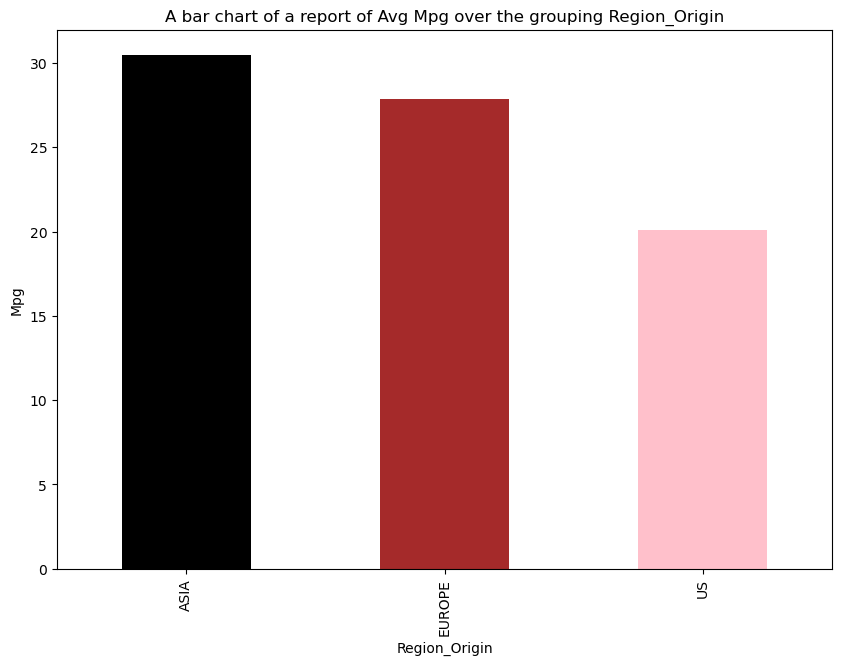

In [73]:
def plot_mpg_region(my_group):
    bar_plot1= my_group['Mpg'].mean().plot(kind="bar", ylabel="Mpg",figsize=(10,7),
                                       title="A bar chart of a report of Avg Mpg over the grouping Region_Origin",
                                      color=['black', 'brown','pink']) # created a barchart for mpg values grouped by Region_origin
    
    
    return bar_plot1


plot_mpg_region(group1)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Exercise 7: Data Exploration and Analysis 

Create a function `plot_mpg_year()` that reports the mpg over the grouping `Model Year`.  Consider using line, bar, scatter plots.  

The function should: 

* take as input a DataFrame group (from above)
* report mpg over the group 
* make sure the plot looks good and has labels, title, etc. 

<Axes: title={'center': ' A bar chart of a report of Avg Mpg over the grouping Model Year'}, xlabel='Model_Year', ylabel='Mpg'>

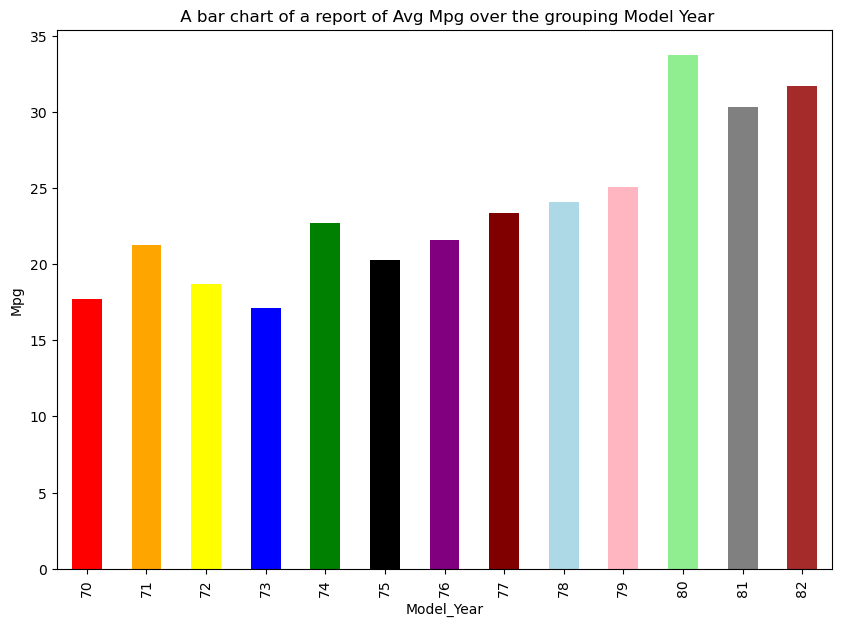

In [74]:
def plot_mpg_year(my_group):
    bar_plot2 =my_group['Mpg'].mean().plot(kind="bar", ylabel="Mpg",title=" A bar chart of a report of Avg Mpg over the grouping Model Year", 
                                           figsize=(10,7), color=['red','orange','yellow','blue','green',
                                        'black','purple','maroon','lightblue','lightpink','lightgreen','grey','brown'])# created a barchart for mpg values grouped by Model year
    
    return bar_plot2


plot_mpg_year(group2)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Exercise 8: Data Exploration and Analysis 

Create a function `plot_mpg_year_region()` that reports the mpg over the both groupings `Model Year` and `Region`.  Think about what is the appropriate type of plot.  

The function should: 

* take as input the DataFrame (*note, this is different than the other plots*)
* report mpg over both groups
* make sure the plot looks good and has labels, title, etc. 

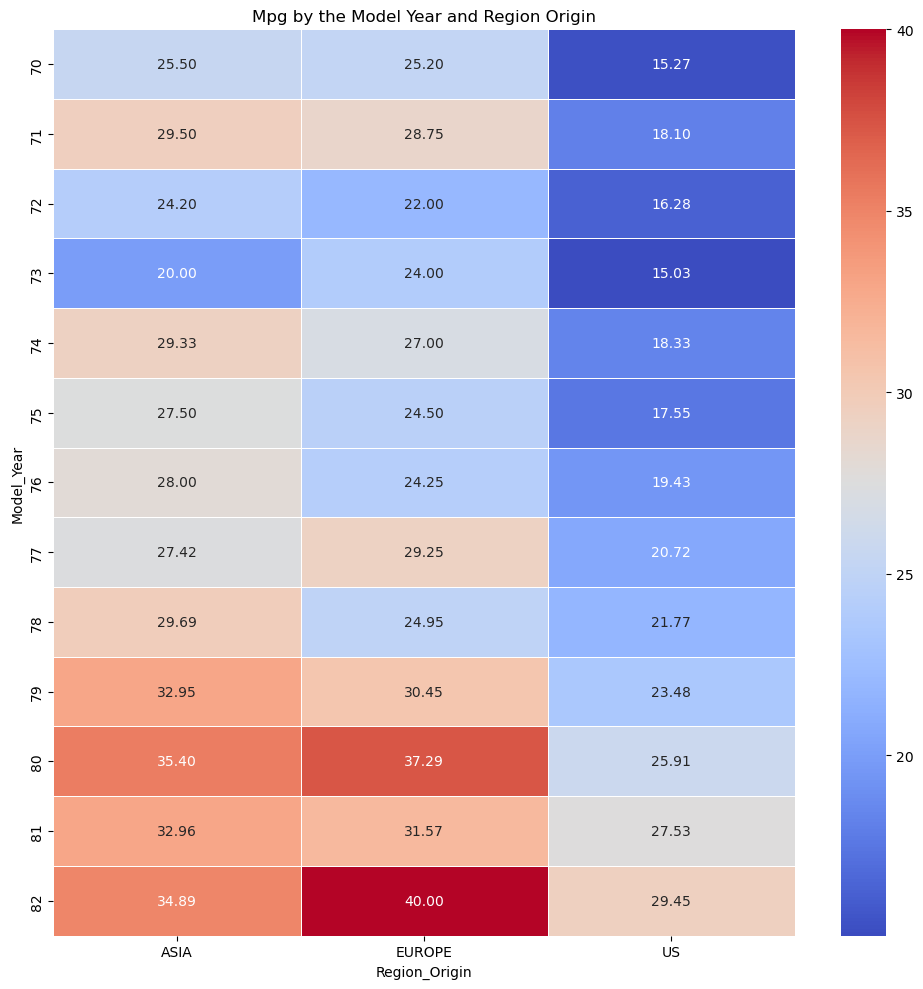

In [75]:
mpg_pivot= data.pivot_table(values='Mpg', index='Model_Year',columns='Region_Origin', aggfunc='mean') #creating a table giving values, index and columns
plt.rcParams['figure.figsize']=(10,10)
sns.heatmap(mpg_pivot, annot= True, cmap='coolwarm', fmt='.2f', cbar=True, linewidth= 0.5) #creating a heat map for the created table using seaborn library
plt.xlabel('Region_Origin')
plt.ylabel('Model_Year')
plt.title("Mpg by the Model Year and Region Origin")
plt.tight_layout()
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Exercise 9: Explore Additional aspects of the data using statistics 

Look at the statistics for 2 of the `float` variables in the data set.  
Report the mean, standard deviation, 5-number summary.  

Plot the distributions using histograms.  

Which distribution has the most skew? 

Look at the statistics and distribution again now grouped by country of origin.  

Look at the statistics and distribution again now grouped by number of cylinders.  

In [76]:
# we chose Mpg and Weight as our float values
# Statistical calculation for the Mgp
print("Calculation for Mpg")
print(data['Mpg'].dtype)
Mean1=data['Mpg'].mean()
Sd1= data['Mpg'].std()
Five_summary1=data['Mpg'].describe().loc[['min', '25%', '50%', '75%', 'max']]
print("Mean=",Mean1) 
print("Standard deviation=",Sd1)
print("5-number summary=",Five_summary1)
# Statistical calculation for the Weight
print("Calculation for Weight")
print(data['Weight'].dtype)
Mean2=data['Weight'].mean()
Sd2= data['Weight'].std()
Five_summary2=data['Weight'].describe().loc[['min', '25%', '50%', '75%', 'max']]
print("Mean=",Mean2) 
print("Standard deviation=",Sd2)
print("5-number summary=",Five_summary2)

Calculation for Mpg
float64
Mean= 23.514572864321607
Standard deviation= 7.815984312565782
5-number summary= min     9.0
25%    17.5
50%    23.0
75%    29.0
max    46.6
Name: Mpg, dtype: float64
Calculation for Weight
float64
Mean= 2970.424623115578
Standard deviation= 846.8417741973271
5-number summary= min    1613.00
25%    2223.75
50%    2803.50
75%    3608.00
max    5140.00
Name: Weight, dtype: float64


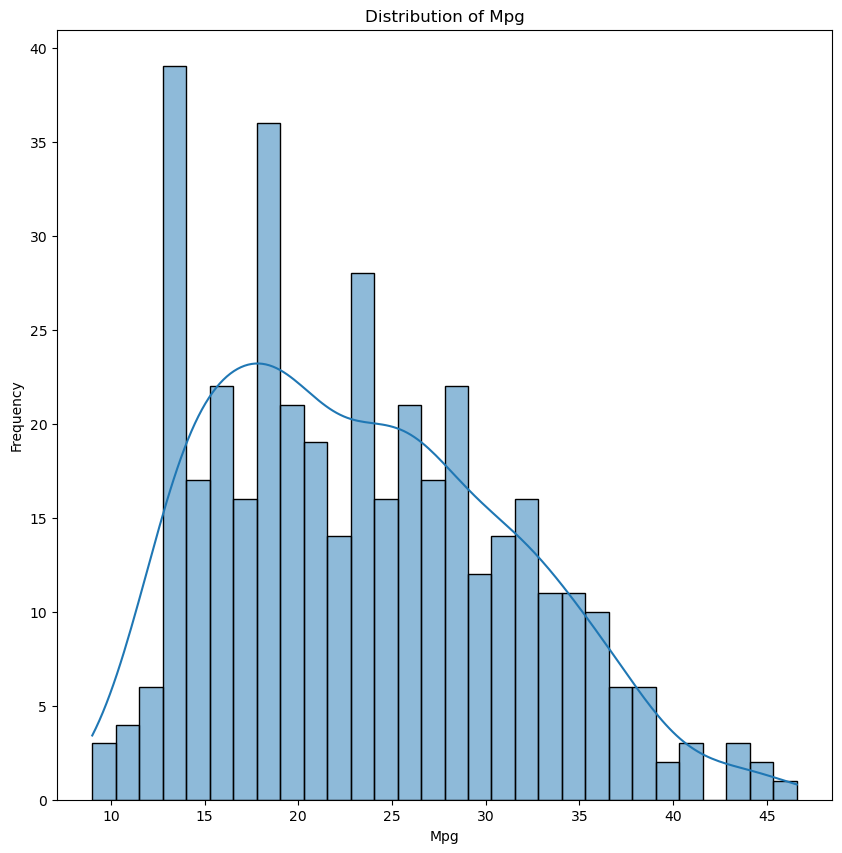

In [77]:
#creating a histogram plot for Mpg
hist1=sns.histplot(data['Mpg'],bins=30, edgecolor='black',kde= True)
hist1.set_xlabel('Mpg')
hist1.set_ylabel('Frequency')
hist1.set_title('Distribution of Mpg')
plt.show()

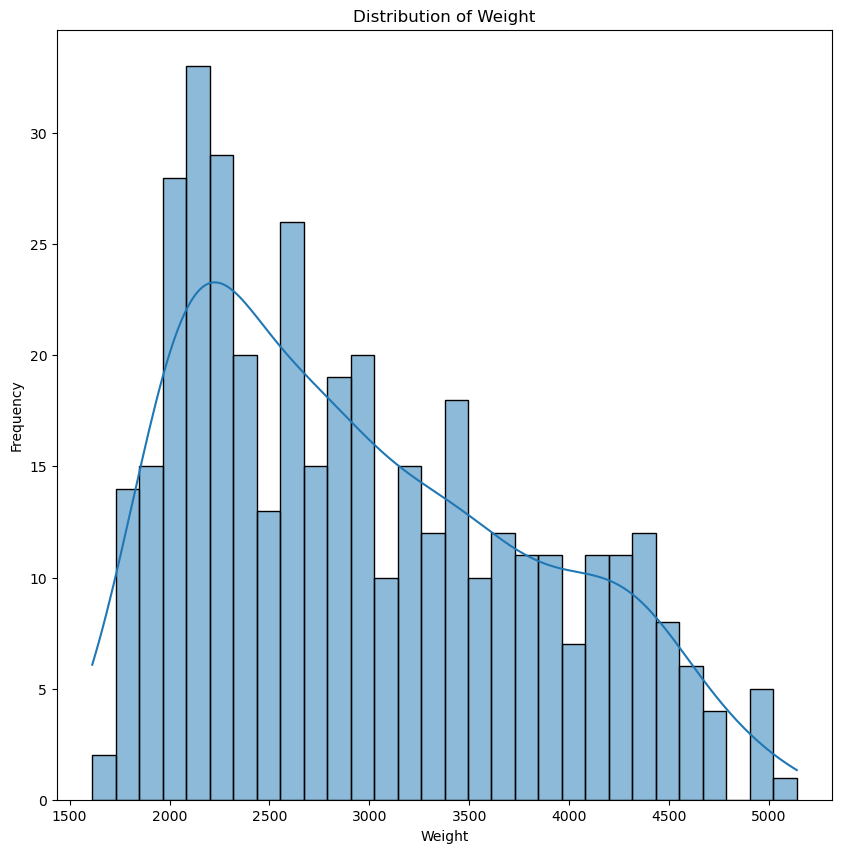

In [78]:
#creating a histogram plot for Weight
hist2=sns.histplot(data['Weight'],bins=30, edgecolor='black', kde= True)
hist2.set_xlabel('Weight')
hist2.set_ylabel('Frequency')
hist2.set_title('Distribution of Weight')
plt.show()

In [79]:
data['Mpg'].skew() # checking the skewness for Mpg histogram plot

0.45706634399491913

In [80]:
data['Weight'].skew()# chekcking the skewness for Weight histogram plot

0.5310625125994629

**Comparing the distrbution of Mpg and Weight; Weight distribution has more skewness in the right direction.**

In [81]:
#Grouping the Mpg and Weight by the country of origin
group_countryorigin=data[['Mpg','Weight']].groupby(data['Region_Origin']) 
group_countryorigin

In [82]:
for x, group in group_countryorigin: #printing the group
    print (x)
    print ("*** Start ")
    print (group.head(4))
    print ("*** End ")

ASIA
*** Start 
                        Mpg  Weight
car name                           
Toyota_Corona_Mark_Ii  24.0  2372.0
Datsun_Pl510           27.0  2130.0
Datsun_Pl510           27.0  2130.0
Toyota_Corona          25.0  2228.0
*** End 
EUROPE
*** Start 
                               Mpg  Weight
car name                                  
Volkswagen_1131_Deluxe_Sedan  26.0  1835.0
Peugeot_504                   25.0  2672.0
Audi_100_Ls                   24.0  2430.0
Saab_99E                      25.0  2375.0
*** End 
US
*** Start 
                            Mpg  Weight
car name                               
Chevrolet_Chevelle_Malibu  18.0  3504.0
Buick_Skylark_320          15.0  3693.0
Plymouth_Satellite         18.0  3436.0
Amc_Rebel_Sst              16.0  3433.0
*** End 


In [83]:
group_countryorigin['Mpg'].describe() #statstics for the grouped Mpg by country of origin

count       mean       std   min   25%   50%    75%   max
Region_Origin                                                           
ASIA            79.0  30.450633  6.090048  18.0  25.7  31.6  34.05  46.6
EUROPE          70.0  27.891429  6.723930  16.2  24.0  26.5  30.65  44.3
US             249.0  20.083534  6.402892   9.0  15.0  18.5  24.00  39.0

In [84]:
group_countryorigin['Weight'].describe()#statstics for the grouped Weight by country of origin

count         mean         std     min      25%     50%  \
Region_Origin                                                            
ASIA            79.0  2221.227848  320.497248  1613.0  1985.00  2155.0   
EUROPE          70.0  2423.300000  490.043191  1825.0  2067.25  2240.0   
US             249.0  3361.931727  794.792506  1800.0  2720.00  3365.0   

                   75%     max  
Region_Origin                   
ASIA           2412.50  2930.0  
EUROPE         2769.75  3820.0  
US             4054.00  5140.0

<Figure size 400x400 with 0 Axes>

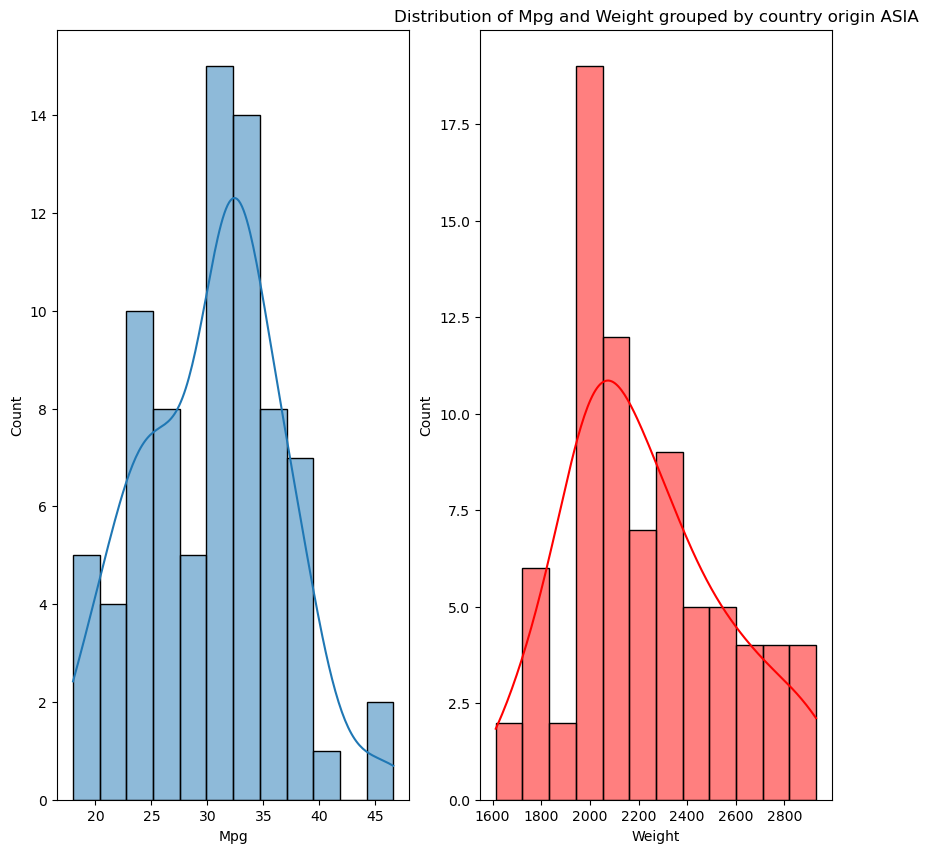

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

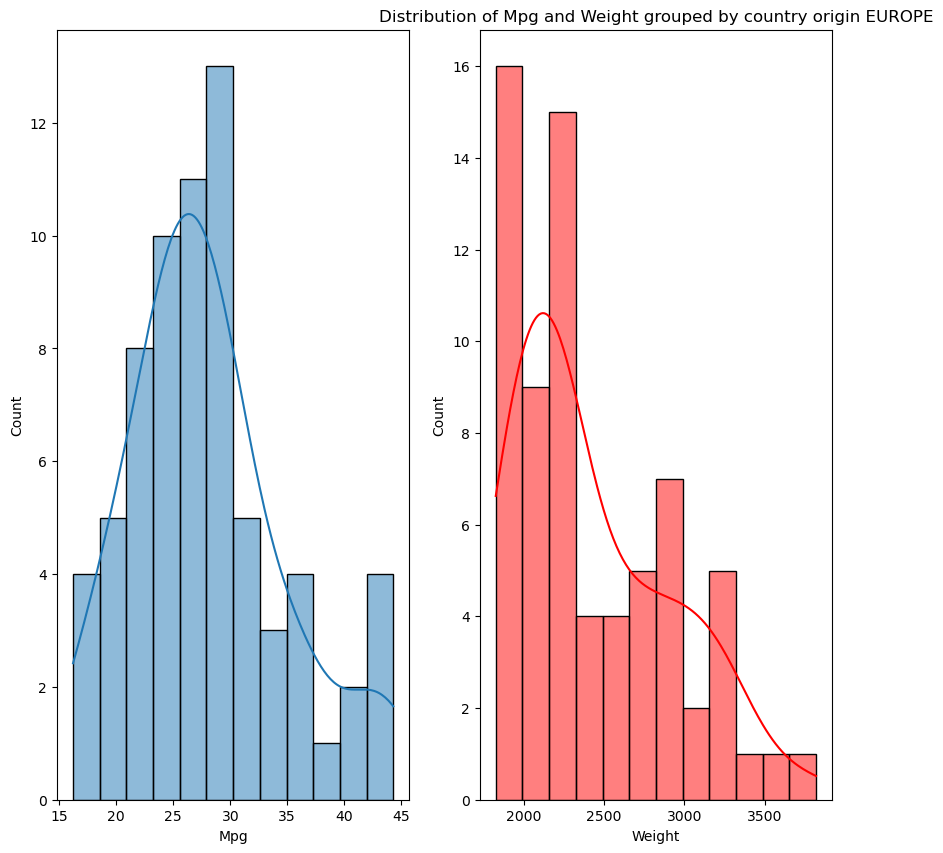

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

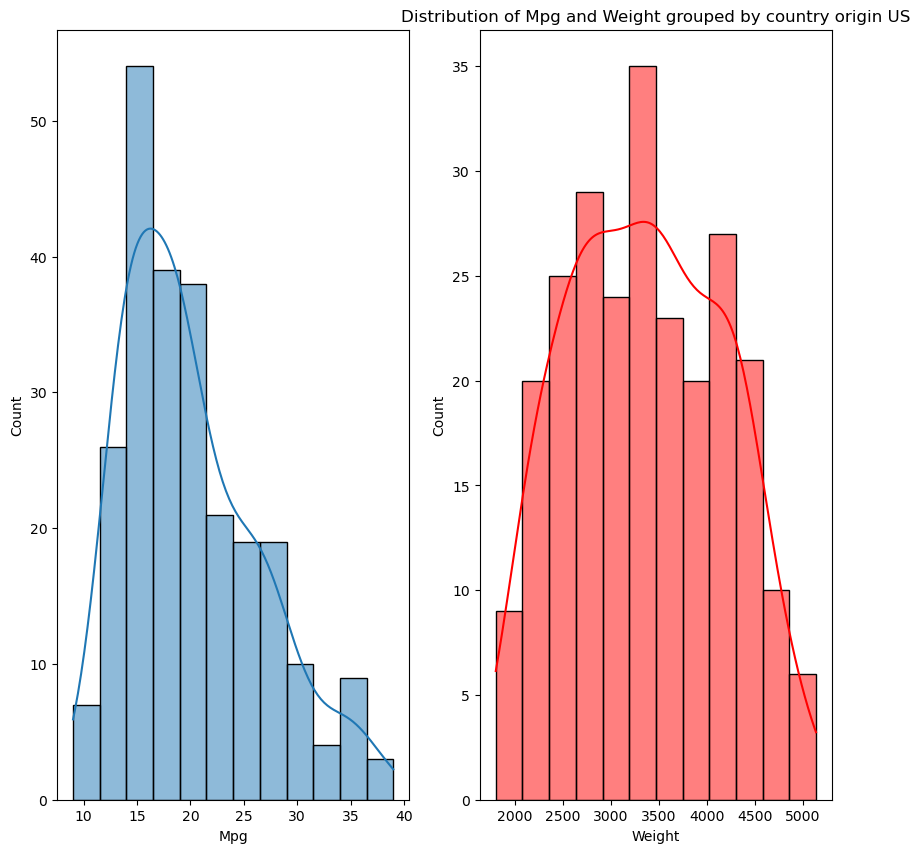

<Figure size 400x400 with 0 Axes>

In [101]:
# creating a histogram distribiton plot for Mpg and Weight groupped by Region Origin
for name,group in group_countryorigin:
    plt.figure(figsize=(4,4))
    fig, axes = plt.subplots(1, 2)
    sns.histplot(group['Mpg'],ax=axes[0], label=name, bins= 12, kde=True)
    plt.title(f'Distribution of Mpg and Weight grouped by country origin {name}')
    plt.figure(figsize=(4,4))
    sns.histplot(group['Weight'],ax=axes[1], label=name, bins= 12, kde=True, color="red")
plt.show()

In [86]:
#Grouping the Mpg and Weight by the country of origin
group_cylinder=data[['Mpg','Weight']].groupby(data['Cyl']) 


In [87]:
for x, group in group_cylinder: #printing the group
    print (x)
    print ("*** Start ")
    print (group.head(4))
    print ("*** End ")

3
*** Start 
                  Mpg  Weight
car name                     
Mazda_Rx2_Coupe  19.0  2330.0
Maxda_Rx3        18.0  2124.0
Mazda_Rx-4       21.5  2720.0
Mazda_Rx-7_Gs    23.7  2420.0
*** End 
4
*** Start 
                               Mpg  Weight
car name                                  
Toyota_Corona_Mark_Ii         24.0  2372.0
Datsun_Pl510                  27.0  2130.0
Volkswagen_1131_Deluxe_Sedan  26.0  1835.0
Peugeot_504                   25.0  2672.0
*** End 
5
*** Start 
                      Mpg  Weight
car name                         
Audi_5000            20.3  2830.0
Mercedes_Benz_300D   25.4  3530.0
Audi_5000S_(Diesel)  36.4  2950.0
*** End 
6
*** Start 
                  Mpg  Weight
car name                     
Plymouth_Duster  22.0  2833.0
Amc_Hornet       18.0  2774.0
Ford_Maverick    21.0  2587.0
Amc_Gremlin      21.0  2648.0
*** End 
8
*** Start 
                            Mpg  Weight
car name                               
Chevrolet_Chevelle_Malibu  18.0

In [88]:
group_cylinder['Mpg'].describe() #statstics for the grouped Mpg by cylinder

count       mean       std   min    25%    50%    75%   max
Cyl                                                             
3      4.0  20.550000  2.564501  18.0  18.75  20.25  22.05  23.7
4    204.0  29.286765  5.710156  18.0  25.00  28.25  33.00  46.6
5      3.0  27.366667  8.228204  20.3  22.85  25.40  30.90  36.4
6     84.0  19.985714  3.807322  15.0  18.00  19.00  21.00  38.0
8    103.0  14.963107  2.836284   9.0  13.00  14.00  16.00  26.6

In [89]:
group_cylinder['Weight'].describe()#statstics for the grouped Weight by cylinder

count         mean         std     min      25%     50%      75%     max
Cyl                                                                          
3      4.0  2398.500000  247.566153  2124.0  2278.50  2375.0  2495.00  2720.0
4    204.0  2308.127451  347.093936  1613.0  2045.75  2232.0  2566.75  3270.0
5      3.0  3103.333333  374.343870  2830.0  2890.00  2950.0  3240.00  3530.0
6     84.0  3198.226190  332.297419  2472.0  2941.25  3201.5  3430.50  3907.0
8    103.0  4114.718447  448.833159  3086.0  3799.00  4140.0  4403.50  5140.0

<Figure size 400x400 with 0 Axes>

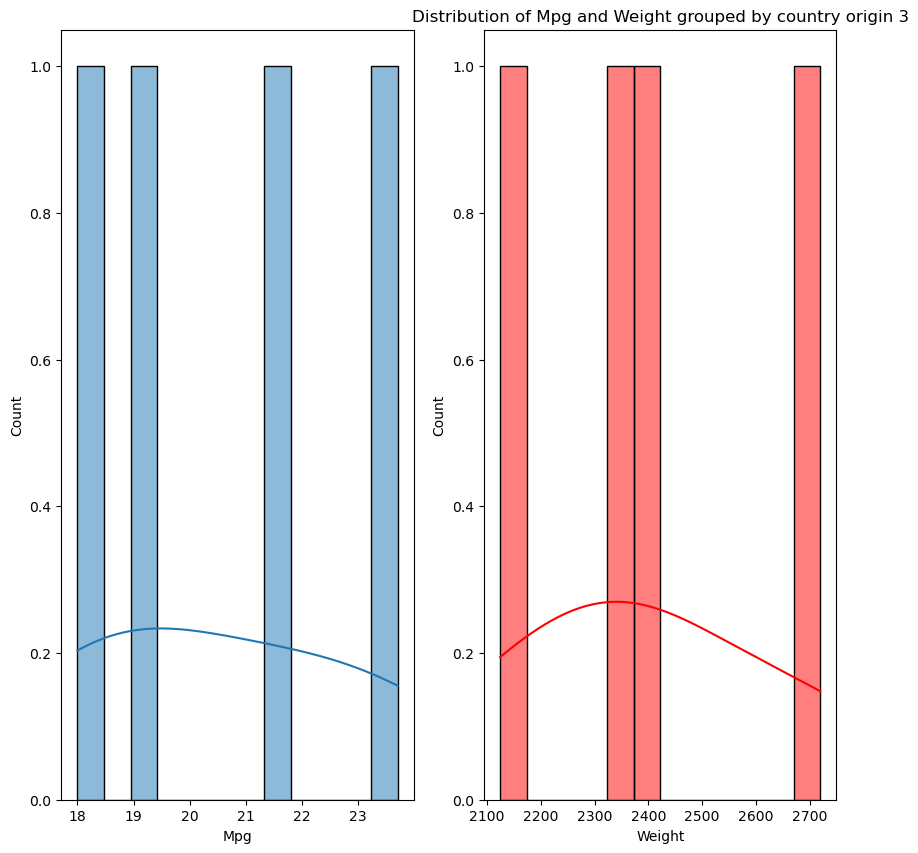

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

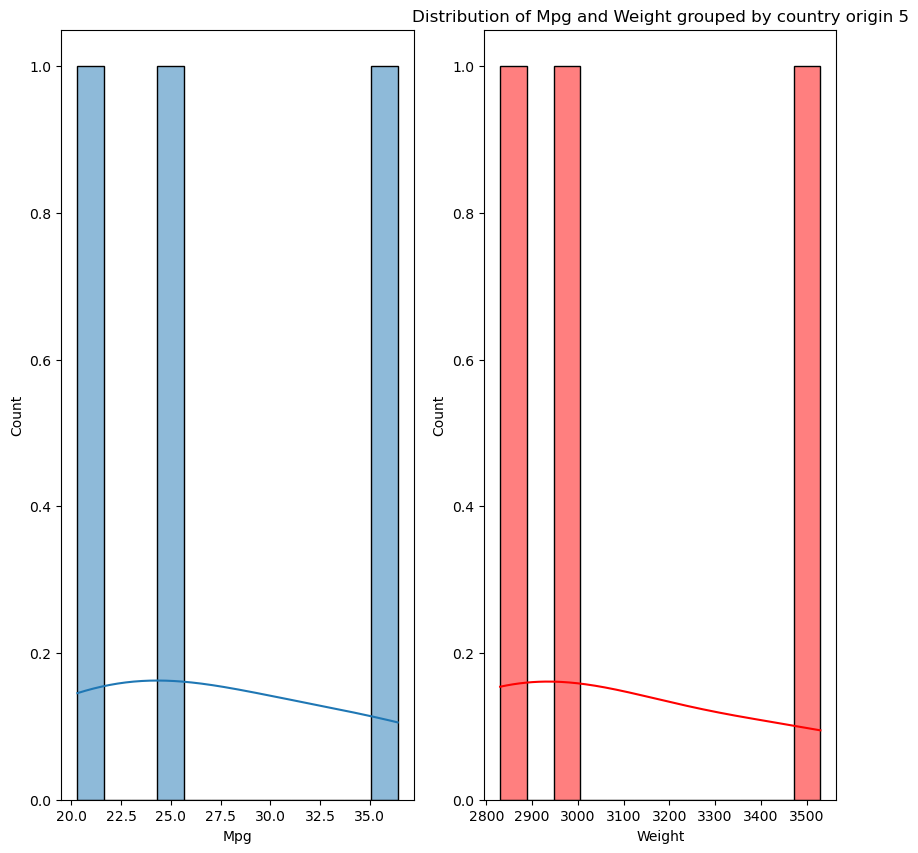

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

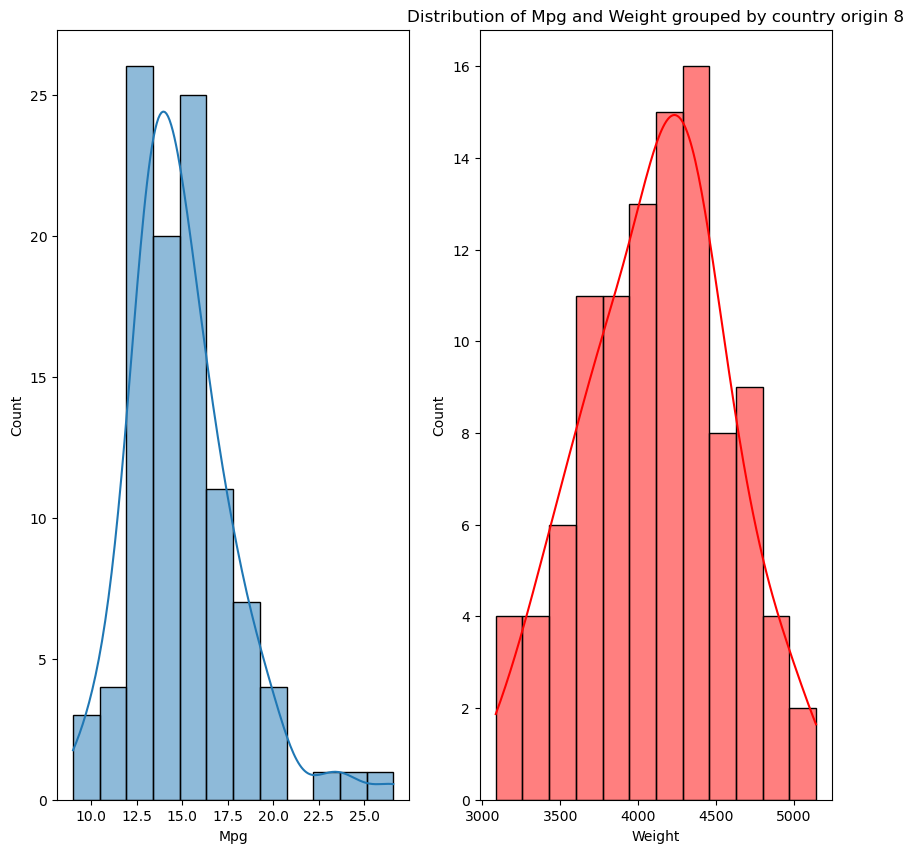

<Figure size 400x400 with 0 Axes>

In [104]:
# creating a histogram distribiton plot for Mpg and Weight groupped by Cylinder
for name,group in group_cylinder:
    plt.figure(figsize=(4,4))
    fig, axes = plt.subplots(1, 2)
    sns.histplot(group['Mpg'],ax=axes[0], label=name, bins= 12, kde=True)
    plt.title(f'Distribution of Mpg and Weight grouped by country origin {name}')
    plt.figure(figsize=(4,4))
    sns.histplot(group['Weight'],ax=axes[1], label=name, bins= 12, kde=True, color="red")
plt.show()


<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)